In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

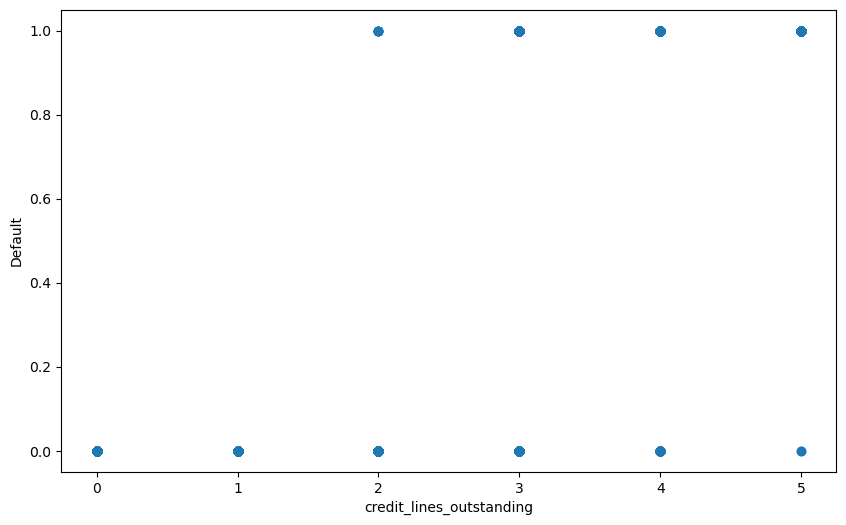

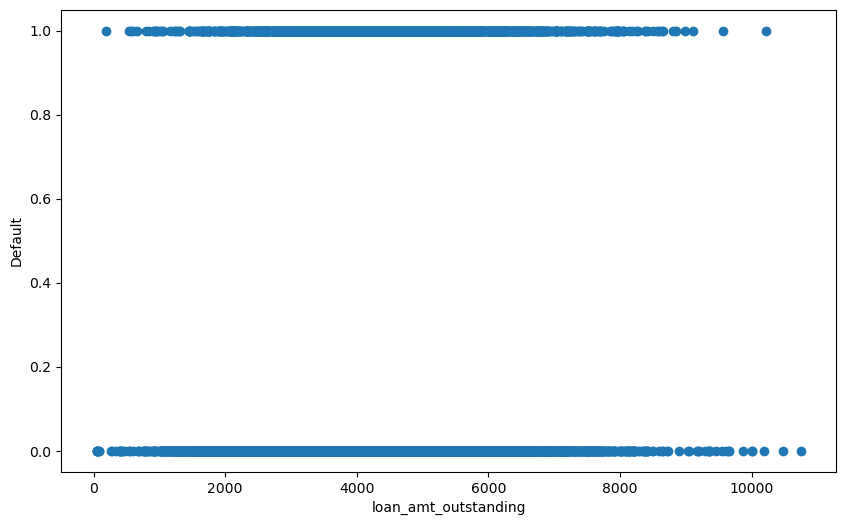

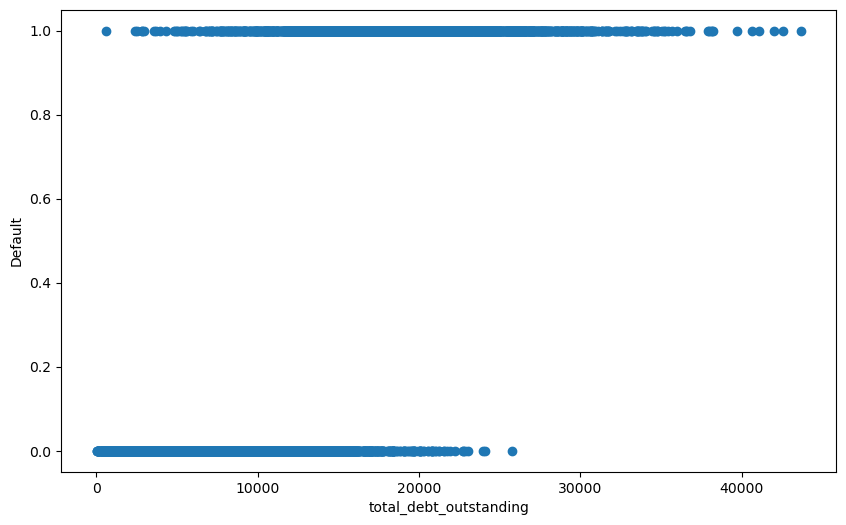

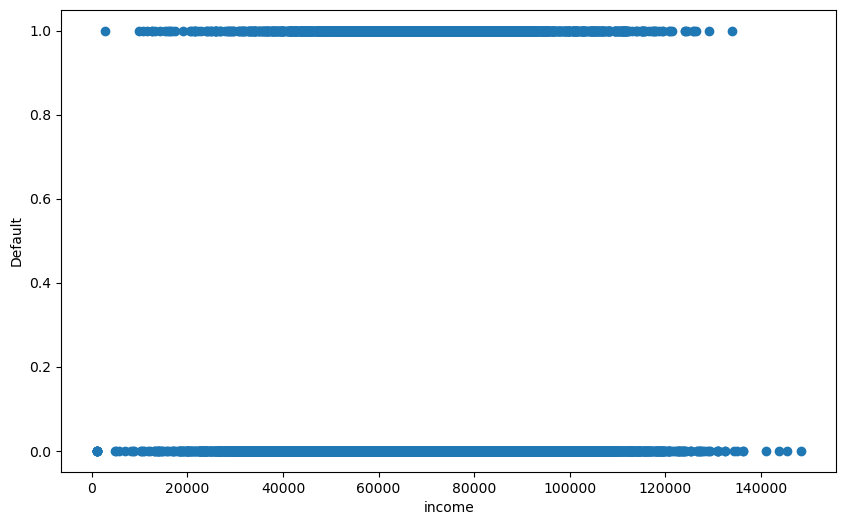

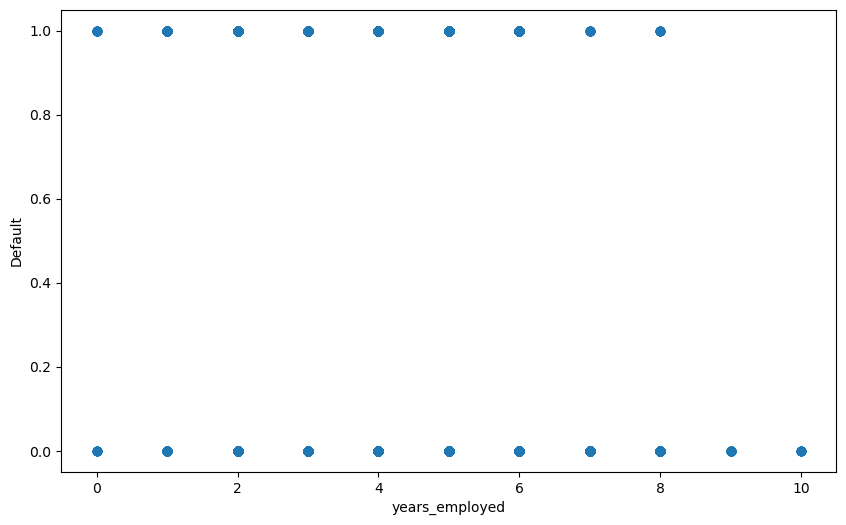

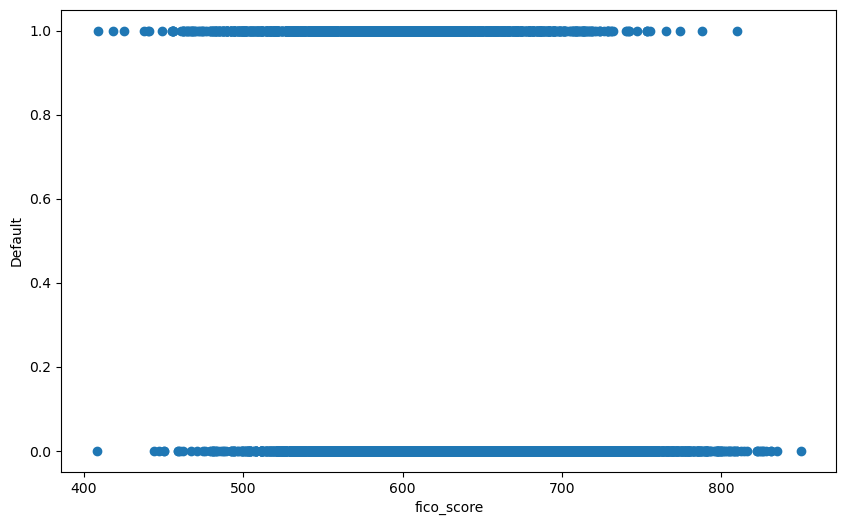

In [3]:

data = pd.read_csv("Task 3 and 4_Loan_Data.csv")

data.head(10)
data.drop('customer_id',axis = 1,inplace = True)

true_y = data['default']

for col in data.columns:
    if col!='default':
        plt.figure(figsize = (10,6))
        plt.xlabel(col)
        plt.ylabel('Default')
        
        plt.scatter(data[col],true_y)

In [9]:
data.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0
5,0,5376.886873,7189.121298,85529.84591,2,697,0
6,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4,3302.172238,13067.570210,50352.16821,3,545,1
8,0,2938.325123,1918.404472,53497.37754,4,676,0
9,0,5396.366774,5298.824524,92349.55399,2,447,0


In [4]:
# Scatter plots show a few points, such that people with high amounts of debts outstanding defaults by data
# People on the higher end of income also defaults less as well, and people with high FICO scores default more, ans people with
# low credit_lines_outstanding default less as well. Lets now group by default class and check their average scores

data.groupby('default').mean()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
default,,,,,,
0,0.744140,4092.629025,6322.164549,69883.889804,4.765247,646.938765
1,4.618044,4454.854897,19270.582961,70726.740140,3.617504,596.257699


In [5]:
# Lets take this further and analyze some statistics:

for col in data.columns:
    print(f'box score stats for column {col}, attribute: no-default')
    print(data[col].loc[data['default']==0].describe())
    print()
    print(f'box score stats for column {col}, attribute: default')
    print(data[col].loc[data['default']==1].describe())
    print()

box score stats for column credit_lines_outstanding, attribute: no-default
count    8149.00000
mean        0.74414
std         0.92804
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         5.00000
Name: credit_lines_outstanding, dtype: float64

box score stats for column credit_lines_outstanding, attribute: default
count    1851.000000
mean        4.618044
std         0.637969
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: credit_lines_outstanding, dtype: float64

box score stats for column loan_amt_outstanding, attribute: no-default
count     8149.000000
mean      4092.629025
std       1401.202322
min         46.783973
25%       3106.819120
50%       3974.534449
75%       4967.010407
max      10750.677810
Name: loan_amt_outstanding, dtype: float64

box score stats for column loan_amt_outstanding, attribute: default
count     1851.000000
mean      4454.854897
std       1471.586769
min 

In [7]:
# Lets also analyze grouping by some other metrics:

data.groupby('years_employed').mean()

#Here we can see that clearly as years_employed goes up we are less likely to default


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,fico_score,default
years_employed,,,,,,
0,2.656250,4659.681572,14176.321909,67633.386003,589.562500,0.687500
1,2.560976,4658.612808,13606.051548,71382.026609,594.310976,0.567073
2,1.670058,4548.122434,10225.035812,70504.444278,621.517442,0.335756
3,1.710720,4377.788884,10146.232572,69724.314201,617.657969,0.322178
4,1.448488,4266.358479,9103.234532,70163.845025,631.572779,0.216446
5,1.313131,4079.695445,8005.944191,70116.519949,645.635198,0.121601
6,1.195210,3913.267816,7363.013223,69235.523576,647.304790,0.080240
7,1.378012,3853.935981,7267.437647,70801.053601,666.170181,0.030120
8,1.763636,3702.545458,7868.041891,71282.163580,671.290909,0.043636


In [8]:
# Here we also see that credit_lines_outstanding also has a direct correlation with default risk
data.groupby('credit_lines_outstanding').mean()


,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
credit_lines_outstanding,,,,,,
0,4119.046194,4099.454066,69497.693895,4.155039,641.726744,0.000000
1,4046.998214,7169.715742,70153.553229,5.385328,655.104247,0.000000
2,4110.226970,10113.530293,70953.546209,5.374723,649.934590,0.007761
3,4214.397602,13248.195088,69947.497164,4.587646,626.265442,0.228715
4,4335.911268,16399.851515,69744.275827,3.975207,607.128099,0.851240
5,4457.357237,20587.090590,71056.246544,3.784117,597.212799,0.998458


In [19]:
# Summarized by our data visualization, we can see that loan_amt_outstanding and total_debt_outstanding have small effects
# on default, while years_employed, credit_lines_outstanding, etc have huge impacts. Let's perform some cleaning here

from scipy import stats

data.describe()

#Let's check null entires first and remove them



,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.00000
mean,1.406602,4112.850613,8352.971992,69423.891463,4.565819,638.133689,0.17275
std,1.703171,1354.897181,6000.915577,19305.272411,1.554382,59.699322,0.37805
min,0.000000,418.126906,139.833690,10682.551470,0.000000,459.000000,0.00000
25%,0.000000,3144.991143,4162.494763,56219.408310,3.000000,598.000000,0.00000
50%,1.000000,4021.186747,6642.150924,69573.464895,5.000000,639.000000,0.00000
75%,2.000000,4997.227905,10875.377180,82606.429122,6.000000,679.000000,0.00000
max,5.000000,8416.164869,28364.215580,127533.816100,9.000000,816.000000,1.00000


In [20]:
missing = data.isnull().sum()
print(missing)

#There are no null entries, let's proceed to remove outliers.

#Let's consider an entry an outlier if it has a column value that has a z-score >3 in one of its columns

for col in data.columns:
    data['z-score'] = np.abs(stats.zscore(data[col]))
    data = data[data['z-score']<3]
    data = data.drop(columns = 'z-score')
    
data.describe()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000
mean,1.374611,4089.183759,8171.700944,69103.548889,4.574216,638.527195,0.165248
std,1.677738,1331.572735,5741.569237,19071.200812,1.554953,59.577034,0.371424
min,0.000000,429.859613,139.833690,11771.471950,0.000000,460.000000,0.000000
25%,0.000000,3137.972293,4141.402292,56051.621370,3.000000,598.000000,0.000000
50%,1.000000,4002.361097,6581.737108,69294.731640,5.000000,639.000000,0.000000
75%,2.000000,4963.141465,10665.373478,82046.717683,6.000000,680.000000,0.000000
max,5.000000,8175.079724,26326.212130,125387.016000,9.000000,816.000000,1.000000


In [21]:
data.groupby('default').describe()
# We can see that there is a clear class imbalance with defaults and non-defaults

credit_lines_outstanding                                               \
                           count      mean       std  min  25%  50%  75%  max   
default                                                                         
0                         8042.0  0.741234  0.925835  0.0  0.0  0.0  1.0  5.0   
1                         1592.0  4.574121  0.662952  2.0  4.0  5.0  5.0  5.0   

        loan_amt_outstanding               ... years_employed      fico_score  \
                       count         mean  ...            75%  max      count   
default                                    ...                                  
0                     8042.0  4068.988442  ...            6.0  9.0     8042.0   
1                     1592.0  4191.200553  ...            5.0  8.0     1592.0   

                                                                   
               mean        std    min    25%    50%    75%    max  
default                                                            
0        646.813852  56.355005  460.0  609.0  647.0  685.0  816.0  
1        596.667085  57.784584  461.0  557.0  597.0  636.0  810.0  

[2 rows x 48 columns]

In [53]:
#Lets use SMOTE to create synthetic data entries to mediate class inbalances

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

os = SMOTE(random_state = 42)

data_x = data.drop(columns = ['default'])
#print(data_x.head(10))

data_y = data['default']
#print(data_y.head(10))
cols = data_x.columns

x_train, x_test, y_train , y_test =train_test_split(data_x,data_y, test_size = 0.2)

smote_x, smote_y = os.fit_resample(x_train,y_train)

smote_x = pd.DataFrame(data = smote_x, columns = cols)

count = 0
for val in smote_y:
    #print(val)
    if val==1:
        count+=1
print(count/len(smote_y))
print(len(smote_y))
smote_y = pd.DataFrame(data = smote_y)
print(smote_y)


0.5
12904
       default
0            0
1            0
2            0
3            0
4            0
...        ...
12899        1
12900        1
12901        1
12902        1
12903        1

[12904 rows x 1 columns]


In [61]:

# Lets now determine what features to select. From visualization we saw that debt outstanding, loan outstanding were
# mildly telling of defaulting, income seemed to have no relation at all, while credit lines outstanding, FICO score, and
# years employed were telling features. Lets use Recursive Feature Elimination from sklearn to select features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(estimator= model,n_features_to_select = 5)
rfe = rfe.fit(smote_x,smote_y)
print(rfe.support_)
print(rfe.ranking_)

feature_importance = pd.DataFrame({'Feature':cols,'Importance':rfe.ranking_})
print(feature_importance)


[ True  True  True False  True  True]
[1 1 1 2 1 1]
                    Feature  Importance
0  credit_lines_outstanding           1
1      loan_amt_outstanding           1
2    total_debt_outstanding           1
3                    income           2
4            years_employed           1
5                fico_score           1


C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [62]:
model = LogisticRegression()

rfe = RFE(estimator= model,n_features_to_select = 1)
rfe = rfe.fit(smote_x,smote_y)
print(rfe.support_)
print(rfe.ranking_)

feature_importance = pd.DataFrame({'Feature':cols,'Importance':rfe.ranking_})
print(feature_importance)

[ True False False False False False]
[1 4 5 6 2 3]
                    Feature  Importance
0  credit_lines_outstanding           1
1      loan_amt_outstanding           4
2    total_debt_outstanding           5
3                    income           6
4            years_employed           2
5                fico_score           3


C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jerry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [67]:
# We can see that our visualization's observations are confirmed, that credit_lines outstanding, years_employed, 
# and fico score are the most telling, followed by loan_amt outstanding and debt outstanding, while income is least
# telling in prediction. For the following, I will select the top 3 attributes

cols = []

for i in range(len(feature_importance['Importance'])):
    if feature_importance['Importance'][i]<=3:
        cols.append(feature_importance['Feature'][i])
print(cols)
    

['credit_lines_outstanding', 'years_employed', 'fico_score']


In [68]:
# Lets test the p-values of our variables with statsmodels library
X = smote_x[cols]
Y = smote_y['default']

import statsmodels.api as sm

logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.029219
         Iterations 13
                             Results: Logit
Model:                  Logit               Pseudo R-squared:    0.958   
Dependent Variable:     default             AIC:                 760.0739
Date:                   2024-06-29 00:55    BIC:                 782.4698
No. Observations:       12904               Log-Likelihood:      -377.04 
Df Model:               2                   LL-Null:             -8944.4 
Df Residuals:           12901               LLR p-value:         0.0000  
Converged:              1.0000              Scale:               1.0000  
No. Iterations:         13.0000                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
credit_lines_outstanding  7.8486   0.40

In [70]:

# We see that p-values are essentially zero which tells us these features are very useful for modeling. 
#Lets finally dive into modeling

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

model = LogisticRegression()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)

print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')


precision: 0.9848139711465452
recall: 0.9803476946334089
f1: 0.9825757575757577


In [79]:
# We have achieved a beautifully performing model with 98% precision, recall, and f1 score, so we can stop there.
# Other models that we could've persued included Decision Trees, and an extension of that called Gradient Boost Trees with XGBoost

# Lets build a function that returns the expected loss

def expected_loss(model, features,recovery_rate = 0.1):
    # Formula is EL = PD * (1-RR) * EAD(exposure at default)
    
    """
    model: logistic regression model trained to predict probability of default:
    features: array in the form of [credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding
    ,income, years_employed, fico_score]
    recovery_rate: 10% by default, describes the recovery rate of the loan
    """
   
    relevant_features = [[features[0],features[4],features[5]]]
    
    PD = model.predict_proba(relevant_features)[:,1]
    #print(f'PD is {PD}')
    
    EAD = features[1]
    
    return PD*(1-recovery_rate)*EAD


print(expected_loss(model,[4,12323,52324,60000,8,567]))
    
    
    
    

[2094.21771022]


C:\Users\jerry\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
